# Problem Session 4
## More Regression

The problems in this notebook will cover the content covered in our `Regression` lectures including:
- `Simple Linear Regression`,
- `A First Predictive Modeling Project`,
- `Multiple Linear Regression` and
- `Categorical Variables and Interactions`.

In [1]:
## We first load in packages we will need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

#### 1. Preparing the data

In this notebook you will continue to model the ultimate selling price of various vechicles. First we have to load the data and repeat some of the cleaning we did in `Problem Session 3`.

##### a.

- Load the `car_sales.csv` data set again
- Remove the missing values
- Create the `log_sell` and `log_km` columns
- Clean the `mileage`, `engine` and `max_power` columns with `clean_column` and
- Create the `age` column.

In [2]:
def clean_column(text):
    return float(text.split()[0])

In [3]:
carsdf = pd.read_csv('car_sales.csv')
carsdf.dropna(inplace=True)


In [4]:
carsdf['mileage'] = carsdf['mileage'].apply(clean_column)
carsdf['engine'] = carsdf['engine'].apply(clean_column)
carsdf['max_power'] = carsdf['max_power'].apply(clean_column)
carsdf['age'] = 2020 - carsdf['year']
carsdf['log_sell'] = np.log10(carsdf['selling_price'])
carsdf['log_km'] = np.log10(carsdf['km_driven'])

##### b.

Make the train test split using `sklearn`'s `train_test_split`.

In [5]:
## Import train test split here
from sklearn.model_selection import train_test_split

In [6]:
## Make the train test split
## call the training set cars_train
## call the test set cars_test

cars_train, cars_test = train_test_split(carsdf, test_size=0.2, shuffle=True, random_state=64)


##### c.

If you need to, take a moment to refresh yourself on these data.

In [7]:
np.shape(cars_test)

(1581, 16)

In [8]:
1581/(1581+6324)

0.2

##### d.

Here is a variable summary for your convenience.

<u>Outcome Variable</u>
- `selling_price` or `log_sell` (you will use `log_sell` in your models)

<u>Continuous Features</u>
- `km_driven` and thus `log_km`
- `mileage`
- `engine`
- `max_power`
- `seats`
- `age`

<u>Categorical Features</u>
- `fuel`
- `seller_type`
- `transmission`
- `owner`

You will ignore `torque` because it would require more cleaning than we will spend time on in these problem sessions.

#### 2. More EDA

In `Problem Session 3` you examined potential linear relationships with `log_sell` and:
- `log_km`,
- `mileage` and
- `age`.

In this notebook you will examine potential effects of the various categorical variables listed above.

##### a. 

One way to examine if a cateorical variable has an impact on an outcome variable is to compare the mean or median of the outcome variable among the different categories.

Use `pandas` `groupby`, <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html">https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html</a>, to examine the mean or median of `log_sell` by the four categorical features listed above.

In [9]:
## code here
cars_train.groupby('fuel')['log_sell'].mean()

fuel
CNG       5.477590
Diesel    5.748237
LPG       5.275058
Petrol    5.525658
Name: log_sell, dtype: float64

In [10]:
## code here
cars_train.groupby('seller_type')['log_sell'].mean()

seller_type
Dealer              5.952512
Individual          5.587343
Trustmark Dealer    5.831289
Name: log_sell, dtype: float64

In [11]:
## code here
cars_train.groupby('transmission')['log_sell'].mean()

transmission
Automatic    6.102861
Manual       5.576344
Name: log_sell, dtype: float64

In [12]:
## code here
cars_train.groupby('owner')['log_sell'].mean()

owner
First Owner             5.742801
Fourth & Above Owner    5.260145
Second Owner            5.490791
Third Owner             5.361347
Name: log_sell, dtype: float64

In [13]:
## code here


##### b.

Another way to investigate the potential impact of categorical variables is to make plots examining the distribution of the outcome variable for each different category. Two common plots that are considered are box and whisker plots and violin plots. These can be made quickly using `seaborn`'s `boxplot`, <a href="https://seaborn.pydata.org/generated/seaborn.boxplot.html">https://seaborn.pydata.org/generated/seaborn.boxplot.html/</a>, and `violinplot`, <a href="https://seaborn.pydata.org/generated/seaborn.violinplot.html">https://seaborn.pydata.org/generated/seaborn.violinplot.html</a> functions.

Below you will see an example of both plot types. These will plot the training distribution of `log_sell` against `fuel`. After that make either a box plot or a violin plot for the remaining three categorical variables.

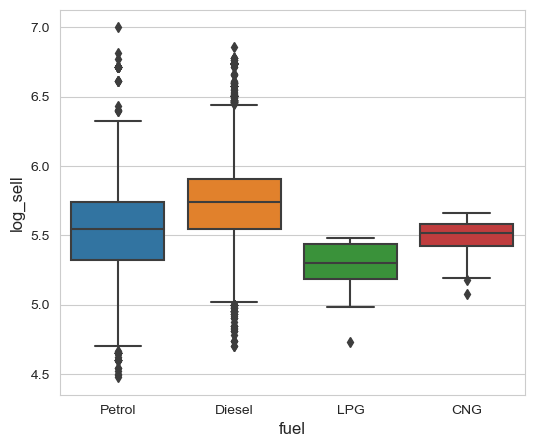

In [14]:
## Boxplot for fuel
plt.figure(figsize=(6,5))

sns.boxplot(data = cars_train,
               y = 'log_sell',
               x = 'fuel')

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.ylabel("log_sell", fontsize=12)
plt.xlabel("fuel", fontsize=12)

plt.show()

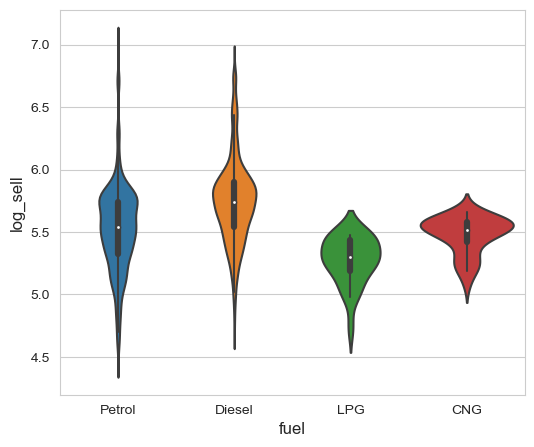

In [15]:
## violinplot for fuel
plt.figure(figsize=(6,5))

sns.violinplot(data = cars_train,
               y = 'log_sell',
               x = 'fuel')

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.ylabel("log_sell", fontsize=12)
plt.xlabel("fuel", fontsize=12)

plt.show()

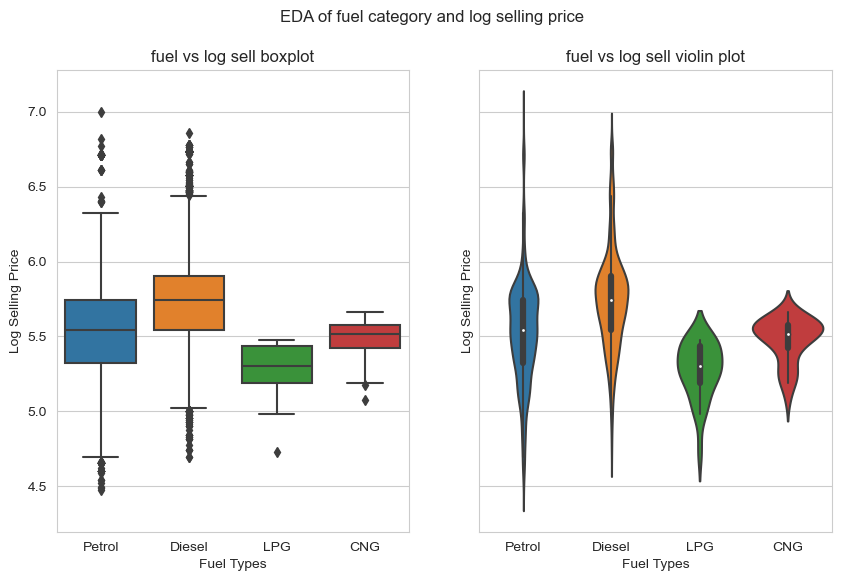

In [16]:
## code here
fig, axes = plt.subplots(1,2, figsize=(10,6), sharey=True)
fig.suptitle('EDA of fuel category and log selling price')
sns.boxplot(ax=axes[0],data=cars_train, y='log_sell', x='fuel')
axes[0].set_title('fuel vs log sell boxplot')
axes[0].set_xlabel('Fuel Types')
axes[0].set_ylabel('Log Selling Price')

sns.violinplot(ax=axes[1], data=cars_train,y='log_sell',x='fuel')
axes[1].set_title('fuel vs log sell violin plot')
axes[1].set_xlabel('Fuel Types')
axes[1].set_ylabel('Log Selling Price')
plt.show()


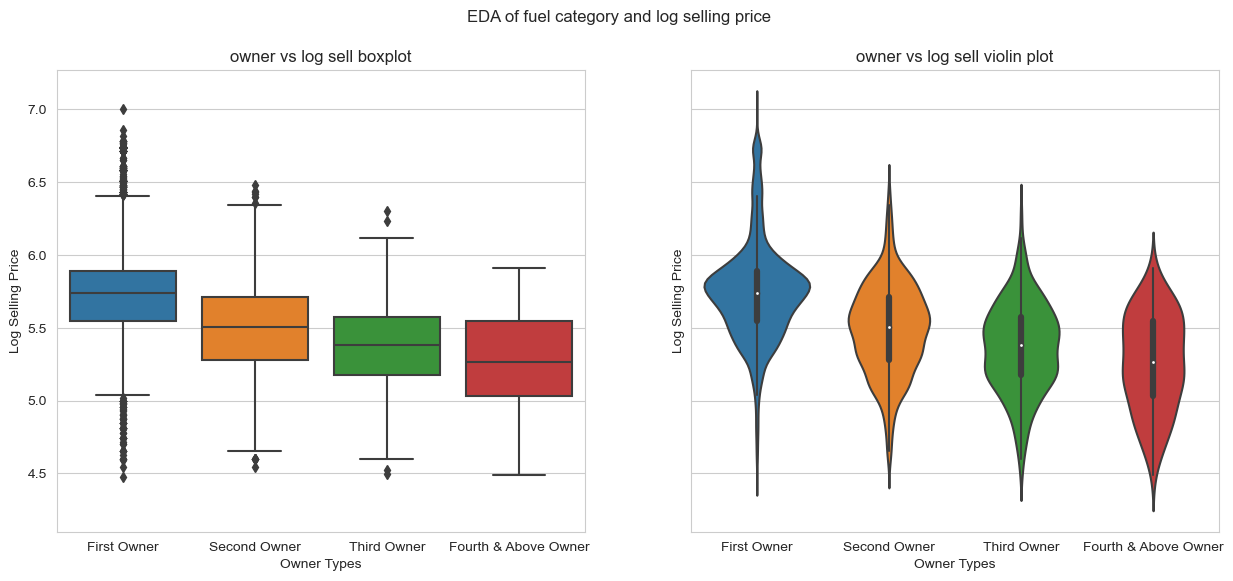

In [17]:
## code here
fig, axes = plt.subplots(1,2, figsize=(15,6), sharey=True)
fig.suptitle('EDA of fuel category and log selling price')
sns.boxplot(ax=axes[0],data=cars_train, y='log_sell', x='owner')
axes[0].set_title('owner vs log sell boxplot')
axes[0].set_xlabel('Owner Types')
axes[0].set_ylabel('Log Selling Price')

sns.violinplot(ax=axes[1], data=cars_train,y='log_sell',x='owner')
axes[1].set_title('owner vs log sell violin plot')
axes[1].set_xlabel('Owner Types')
axes[1].set_ylabel('Log Selling Price')
plt.show()


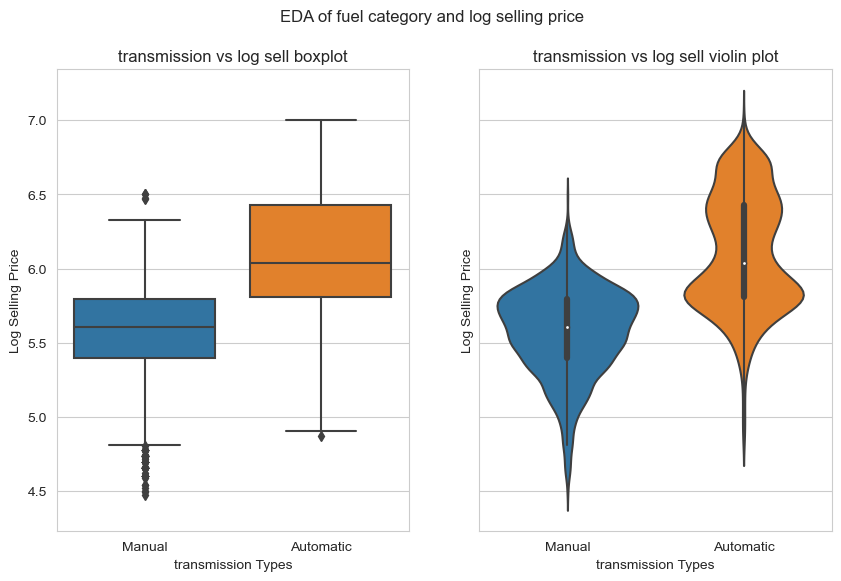

In [18]:
## code here
fig, axes = plt.subplots(1,2, figsize=(10,6), sharey=True)
fig.suptitle('EDA of fuel category and log selling price')
sns.boxplot(ax=axes[0],data=cars_train, y='log_sell', x='transmission')
axes[0].set_title('transmission vs log sell boxplot')
axes[0].set_xlabel('transmission Types')
axes[0].set_ylabel('Log Selling Price')

sns.violinplot(ax=axes[1], data=cars_train,y='log_sell',x='transmission')
axes[1].set_title('transmission vs log sell violin plot')
axes[1].set_xlabel('transmission Types')
axes[1].set_ylabel('Log Selling Price')
plt.show()


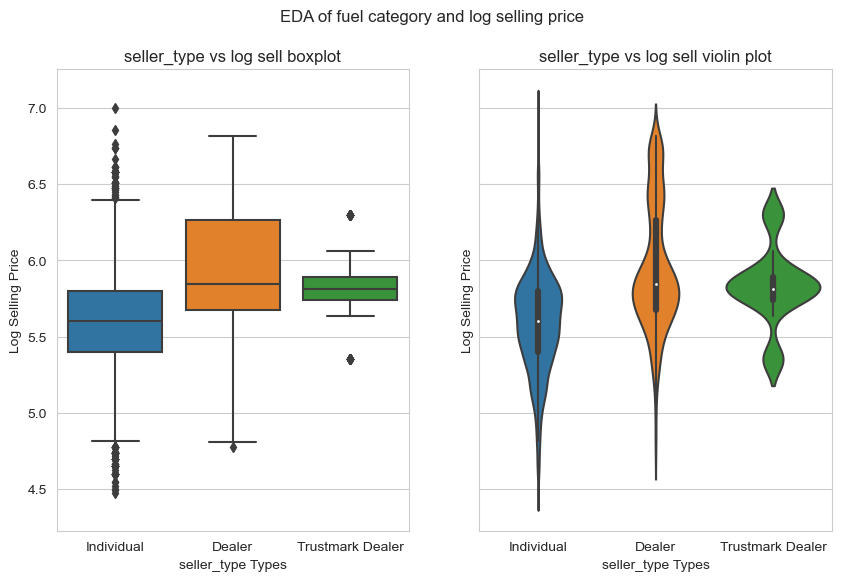

In [19]:
## code here
fig, axes = plt.subplots(1,2, figsize=(10,6), sharey=True)
fig.suptitle('EDA of fuel category and log selling price')
sns.boxplot(ax=axes[0],data=cars_train, y='log_sell', x='seller_type')
axes[0].set_title('seller_type vs log sell boxplot')
axes[0].set_xlabel('seller_type Types')
axes[0].set_ylabel('Log Selling Price')

sns.violinplot(ax=axes[1], data=cars_train,y='log_sell',x='seller_type')
axes[1].set_title('seller_type vs log sell violin plot')
axes[1].set_xlabel('seller_type Types')
axes[1].set_ylabel('Log Selling Price')
plt.show()

In [20]:
## code here



##### c.

Write down any thoughts you have about potentially important categorical variables from your investigations in <i>a.</i> and <i>b.</i> here.

##### Write here
There seems to be a relationship between the transmission types and the owner types



##### d.

From your investigations above you likely noticed that there does seem to be a difference in selling price between vehicles sold by an individual and those sold by some kind of dealer, but the kind of dealer does not seem to matter.

Create a new column in the data set called `dealer` that is `1` if the `seller_type` is a kind of dealership and `0` otherwise.

In [21]:
## Code here
cars_train['dealer'] = [1 if "Dealer" in i else 0 for i in cars_train['seller_type']]

In [22]:
for i, j in zip(cars_train['seller_type'],cars_train['dealer']):
    print(i,j)

Individual 0
Individual 0
Individual 0
Individual 0
Individual 0
Individual 0
Individual 0
Dealer 1
Dealer 1
Individual 0
Individual 0
Individual 0
Individual 0
Individual 0
Individual 0
Individual 0
Individual 0
Individual 0
Individual 0
Individual 0
Individual 0
Individual 0
Individual 0
Dealer 1
Dealer 1
Individual 0
Individual 0
Individual 0
Dealer 1
Individual 0
Individual 0
Individual 0
Individual 0
Dealer 1
Individual 0
Trustmark Dealer 1
Dealer 1
Individual 0
Individual 0
Individual 0
Individual 0
Individual 0
Individual 0
Individual 0
Dealer 1
Individual 0
Individual 0
Individual 0
Individual 0
Individual 0
Dealer 1
Individual 0
Dealer 1
Individual 0
Individual 0
Individual 0
Dealer 1
Individual 0
Individual 0
Individual 0
Individual 0
Dealer 1
Individual 0
Individual 0
Individual 0
Dealer 1
Individual 0
Individual 0
Individual 0
Individual 0
Individual 0
Individual 0
Individual 0
Individual 0
Individual 0
Individual 0
Individual 0
Individual 0
Dealer 1
Individual 0
Individual

##### e.

It appears that different `owner` categories lead to different selling prices. However, it is difficult to tell if this variable is capturing a new signal, or is just reflecting a possible relationship between selling price and the age of the vehicle.

To see what is meant by this statement make a box and whisker plot with `age` on the vertical axis and `owner` on the horizontal. Then make a column called `owner_number` that is `1` when `owner` is `"First Owner"`, is `2` when `owner` is `"Second Owner"` and so on. Calculate the Pearson correlation between `age` and `owner_number`.

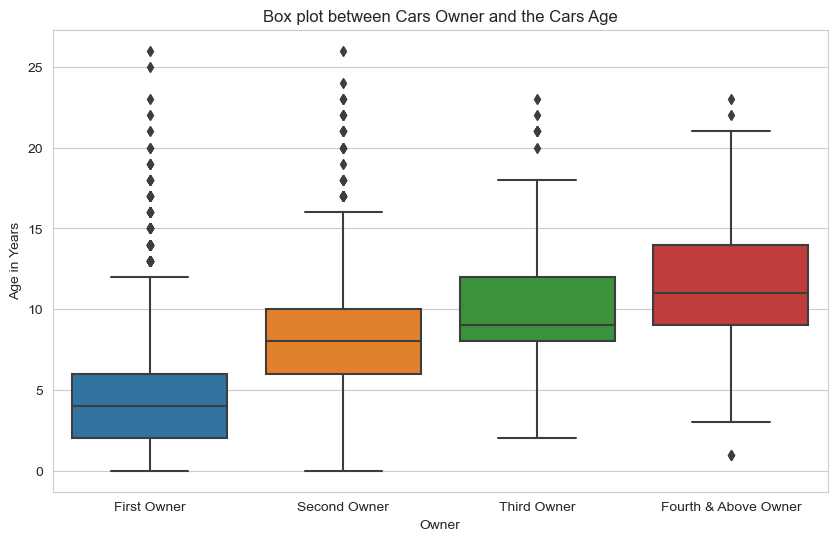

In [23]:
## Code here
fig2, axes2 = plt.subplots(1,1, figsize=(10,6))
sns.boxplot(ax=axes2, data=cars_train, y='age', x='owner')
axes2.set_title('Box plot between Cars Owner and the Cars Age')
axes2.set_xlabel('Owner')
axes2.set_ylabel('Age in Years')
plt.show()

In [24]:
## Code here
ON = np.zeros(len(cars_train['owner'])) #owner number

for i,j in enumerate(cars_train['owner']):
    if j == "First Owner":
        ON[i] = 1
    elif j == "Second Owner":
        ON[i] = 2
    elif j == ("Third Owner"):
        ON[i] = 3
    elif j == "Fourth & Above Owner":
        ON[i] = 4
        
cars_train['owner_number'] = ON

In [25]:
cars_train[['age','owner_number']].corr()

,age,owner_number
age,1.00000,0.50445
owner_number,0.50445,1.00000


The takeaway here is that there is a fair amount of correlation between the age of a vehicle and the number of owners the vehicle has had. From the previous notebook we already know that `log_sell` and `age` have a pretty strong correlation, so it makes sense that `owner` and `log_sell` would also be correlated.


From a predictive modeling sense this means that including `owner` as a categorical feature in a model that also includes `age` may not lead to as huge an improvement to the model as we originally thought.

#### 3. Selecting categorical variables to consider

##### a. 

Using your work in 2. choose some combination of the four categorical variables to add to this model:

$$
\log \left( \text{Selling Price} \right) = \beta_0 + \beta_1 \text{Age} + \epsilon
$$

##### Write here

The four categorical variables are fuel, transmission, owner, and seller type(i.e dealer or individual). We have determined that the owner is correlated to age so we gain no new information from including it. Therefore, we should include only the fuel type, transmission type, and seller type for the model. 


##### b.

Make any dummy variables you need given the categories you chose in 3 <i>a.</i>

In [26]:
## code here
#We have already codified dealer type (cars_train['dealer']) so now we just need to codify the fuel type [fuel_num] and 
#the transmission [transm_num]

cars_train['transm_num'] = [1 if i == "Automatic" else 0 for i in cars_train['transmission']]



In [27]:
## code here
FN = np.zeros(len(cars_train['fuel'])) #fuel number
for i, j in enumerate(cars_train['fuel']):
    if j == 'Petrol':
        FN[i] = 1
    elif j == 'Diesel':
        FN[i] = 2
    elif j == 'LPG':
        FN[i] = 3
    elif j == 'CNG':
        FN[i] = 4

cars_train['fuel_num'] = FN

In [28]:
## code here

cars_train[['log_sell','dealer','transm_num','fuel_num']].corr()

,log_sell,dealer,transm_num,fuel_num
log_sell,1.000000,0.358889,0.495804,0.258639
dealer,0.358889,1.000000,0.376824,-0.025370
transm_num,0.495804,0.376824,1.000000,-0.049283
fuel_num,0.258639,-0.025370,-0.049283,1.000000


In [29]:
cars_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6324 entries, 5878 to 6784
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6324 non-null   object 
 1   year           6324 non-null   int64  
 2   selling_price  6324 non-null   int64  
 3   km_driven      6324 non-null   float64
 4   fuel           6324 non-null   object 
 5   seller_type    6324 non-null   object 
 6   transmission   6324 non-null   object 
 7   owner          6324 non-null   object 
 8   mileage        6324 non-null   float64
 9   engine         6324 non-null   float64
 10  max_power      6324 non-null   float64
 11  torque         6324 non-null   object 
 12  seats          6324 non-null   float64
 13  age            6324 non-null   int64  
 14  log_sell       6324 non-null   float64
 15  log_km         6324 non-null   float64
 16  dealer         6324 non-null   int64  
 17  owner_number   6324 non-null   float64
 18  trans

There appears to be some correlation between the selling price and the transmission so I will make sure to include this in the final model, the other categorical variables don't seem to have a strong correlation but I'll include them anyway to test out multiple models.

#### 4. Comparing models

##### a.

Write out the model(s) you will compare to:

$$
\log \left( \text{Selling Price} \right) = \beta_0 + \beta_1 \text{Age} + \epsilon
$$

using cross-validation below.

##### Write here
Model 1: $log(Selling Price) = \beta_0 + \beta_1 Age + \epsilon$<br>
Model 2: $log(Selling Price) = \beta_0 + \beta_1 Age +\beta_2 Dealer + \epsilon$<br>
Model 3: $log(Selling Price) = \beta_0 + \beta_1 Age +\beta_2 Transmission + \epsilon$<br>
Model 4: $log(Selling Price) = \beta_0 + \beta_1 Age +\beta_2 Fuel + \epsilon$<br>
Model 5: $log(Selling Price) = \beta_0 + \beta_1 Age +\beta_2 Dealer + \beta_2 Transmission +\beta_2 Fuel + \epsilon$<br>
Model 6: $log(Selling Price) = \beta_0 + \beta_1 Age +\beta_2 Dealer + \beta_2 Transmission + \epsilon$



##### b.

Fill in the missing code below to perform 5-fold cross-validation to compare all of the models from 4. <i>a.</i>.

In [30]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

In [35]:
## Make a KFold object
## remember to set a random_state and set shuffle = True
kfold = KFold(n_splits=5, shuffle=True, random_state=64)




## This array will hold the mse for each model and split
mses = np.zeros((6,5))

## sets a split counter
i = 0

## loop through the kfold here
for train_index, test_index in kfold.split(cars_train):
    ## cv training set
    cars_tt = cars_train.iloc[train_index]
    
    ## cv holdout set
    cars_ho = cars_train.iloc[test_index]
    
    #models
    reg1 = LinearRegression().fit(cars_tt['age'].values.reshape(-1,1), cars_tt['log_sell'].values)
    mses[0,i] = mse(cars_ho['log_sell'], reg1.predict(cars_ho['age'].values.reshape(-1,1)))
    
    reg2 = LinearRegression().fit(cars_tt[['age','dealer']].values.reshape(-1,2), cars_tt['log_sell'].values)
    mses[1,i] = mse(cars_ho['log_sell'], reg2.predict(cars_ho[['age','dealer']].values.reshape(-1,2)))
    
    reg3 = LinearRegression().fit(cars_tt[['age','transm_num']].values.reshape(-1,2), cars_tt['log_sell'].values)
    mses[2,i] = mse(cars_ho['log_sell'], reg3.predict(cars_ho[['age','transm_num']].values.reshape(-1,2)))
    
    reg4 = LinearRegression().fit(cars_tt[['age','fuel_num']].values.reshape(-1,2), cars_tt['log_sell'].values)
    mses[3,i] = mse(cars_ho['log_sell'], reg4.predict(cars_ho[['age','fuel_num']].values.reshape(-1,2)))
    
    reg5 = LinearRegression().fit(cars_tt[['age','transm_num','dealer','fuel_num']].values.reshape(-1,4), cars_tt['log_sell'].values)
    mses[4,i] = mse(cars_ho['log_sell'], reg5.predict(cars_ho[['age','transm_num','dealer','fuel_num']].values.reshape(-1,4)))
    
    reg6 = LinearRegression().fit(cars_tt[['age','dealer','transm_num']].values.reshape(-1,3), cars_tt['log_sell'].values)
    mses[5,i] = mse(cars_ho['log_sell'], reg6.predict(cars_ho[['age','dealer','transm_num']].values.reshape(-1,3)))
    
    i = i + 1
    
    
   

In [36]:
mses

array([[0.0637955 , 0.06272244, 0.06782099, 0.06182395, 0.06706285],
       [0.05896437, 0.05854719, 0.0618369 , 0.05737767, 0.06205194],
       [0.050368  , 0.05073438, 0.0512891 , 0.04868329, 0.05078225],
       [0.05699667, 0.05606099, 0.06012301, 0.05611008, 0.05753058],
       [0.04092083, 0.04143907, 0.04121262, 0.04091774, 0.03920253],
       [0.04944492, 0.0498615 , 0.05017707, 0.04776238, 0.04968116]])

In [38]:
## Find the avg cv mse for each model here
print('Mean of Cross-Validated Mean Squared Errors:\n')
print('Model 1:', mses[0,:].mean())
print('Model 2:', mses[1,:].mean())
print('Model 3:', mses[2,:].mean())
print('Model 4:', mses[3,:].mean())
print('Model 5:', mses[4,:].mean())
print('Model 6:', mses[5,:].mean())

Mean of Cross-Validated Mean Squared Errors:

Model 1: 0.06464514608277343
Model 2: 0.05975561520051672
Model 3: 0.05037140421435345
Model 4: 0.05736426526892833
Model 5: 0.04073855909565573
Model 6: 0.049385405959379444


In [39]:
## Calculate the average mse here
np.mean(mses, axis=1)

array([0.06464515, 0.05975562, 0.0503714 , 0.05736427, 0.04073856,
       0.04938541])

##### c. 

Recall that we ultimately care about predicting the final selling price, not the logarithm of the final selling price. Copy and paste your cross-validation code and alter it slightly so that you compare the prediction of:

$$
10^{\log (\text{Selling Price})}
$$

to the actual selling price. Look at the root mean squared error which is in the original units of `selling_price`.

##### Sample Solution

In [45]:
## code here
## Make a KFold object
## remember to set a random_state and set shuffle = True
kfold = KFold(n_splits=5, shuffle=True, random_state=64)




## This array will hold the mse for each model and split
mses = np.zeros((6,5))

## sets a split counter
i = 0

## loop through the kfold here
for train_index, test_index in kfold.split(cars_train):
    ## cv training set
    cars_tt = cars_train.iloc[train_index]
    
    ## cv holdout set
    cars_ho = cars_train.iloc[test_index]
    
    #models
    reg1 = LinearRegression().fit(cars_tt['age'].values.reshape(-1,1), cars_tt['log_sell'].values)
    mses[0,i] = mse(cars_ho['selling_price'], np.power(10, reg1.predict(cars_ho['age'].values.reshape(-1,1))))
    
    reg2 = LinearRegression().fit(cars_tt[['age','dealer']].values.reshape(-1,2), cars_tt['log_sell'].values)
    mses[1,i] = mse(cars_ho['selling_price'], np.power(10, reg2.predict(cars_ho[['age','dealer']].values.reshape(-1,2))))
    
    reg3 = LinearRegression().fit(cars_tt[['age','transm_num']].values.reshape(-1,2), cars_tt['log_sell'].values)
    mses[2,i] = mse(cars_ho['selling_price'], np.power(10, reg3.predict(cars_ho[['age','transm_num']].values.reshape(-1,2))))
    
    reg4 = LinearRegression().fit(cars_tt[['age','fuel_num']].values.reshape(-1,2), cars_tt['log_sell'].values)
    mses[3,i] = mse(cars_ho['selling_price'], np.power(10, reg4.predict(cars_ho[['age','fuel_num']].values.reshape(-1,2))))
    
    reg5 = LinearRegression().fit(cars_tt[['age','transm_num','dealer','fuel_num']].values.reshape(-1,4), cars_tt['log_sell'].values)
    mses[4,i] = mse(cars_ho['selling_price'], np.power(10, reg5.predict(cars_ho[['age','transm_num','dealer','fuel_num']].values.reshape(-1,4))))
    
    reg6 = LinearRegression().fit(cars_tt[['age','dealer','transm_num']].values.reshape(-1,3), cars_tt['log_sell'].values)
    mses[5,i] = mse(cars_ho['selling_price'], np.power(10, reg6.predict(cars_ho[['age','dealer','transm_num']].values.reshape(-1,3))))
    
    i = i + 1




In [47]:
## code here

## Find the avg cv mse for each model here
print('Mean of Cross-Validated Mean Squared Errors:\n')
print('Model 1:', "{:e}".format(mses[0,:].mean()))
print('Model 2:', "{:e}".format(mses[1,:].mean()))
print('Model 3:', "{:e}".format(mses[2,:].mean()))
print('Model 4:', "{:e}".format(mses[3,:].mean()))
print('Model 5:', "{:e}".format(mses[4,:].mean()))
print('Model 6:', "{:e}".format(mses[5,:].mean()))



Mean of Cross-Validated Mean Squared Errors:

Model 1: 5.403271e+11
Model 2: 4.852532e+11
Model 3: 3.817244e+11
Model 4: 5.201755e+11
Model 5: 3.132942e+11
Model 6: 3.646295e+11


In [ ]:
## code here





##### d.

What do you think about these model performances? Do you think these models are good?

##### Write your thoughts here
The models, while good with the logarithmic data, is not actually good with the raw data. These models are not good.



##### e.

What else do you think could be done to improve model performance?

I think that instead of forcing the shape of the data, via takin the logarithm, it would have been better to us a polynomial for the fit.

##### Write your thoughts here




##### f.

If you have time you can use this space to try additional models.

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2023.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)